In [4]:
import pandas as pd

# Carregar datasets
df1 = pd.read_csv('/diabetes_012_health_indicators_BRFSS2015.csv')
df2 = pd.read_csv('/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
df3 = pd.read_csv('/diabetes_binary_health_indicators_BRFSS2015.csv')

# Padronizar nome da variável alvo
df1 = df1.rename(columns={'Diabetes_012': 'Diabetes'})
df2 = df2.rename(columns={'Diabetes_binary': 'Diabetes'})
df3 = df3.rename(columns={'Diabetes_binary': 'Diabetes'})

# Concatenar
df = pd.concat([df1, df2, df3], axis=0, ignore_index=True)

print("Dataset carregado com sucesso!")
print("Dimensão:", df.shape)

Dataset carregado com sucesso!
Dimensão: (578052, 22)


In [6]:
X = df.drop('Diabetes', axis=1)
y = df['Diabetes']

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

In [10]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("R²:", r2)
print("RMSE:", rmse)
print("MAE:", mae)

R²: 0.17692439823936768
RMSE: 0.5060284526100074
MAE: 0.3485354208007071


In [11]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train_scaled, y_train,
                            cv=5, scoring='r2')

print("R² médio (CV):", cv_scores.mean())

R² médio (CV): 0.17263107837967245


In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

X_vif = pd.DataFrame(X_train_scaled, columns=X.columns)

vif_data = pd.DataFrame()
vif_data["Variável"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i)
                   for i in range(X_vif.shape[1])]

print(vif_data.sort_values(by="VIF", ascending=False))

                Variável       VIF
13               GenHlth  1.821974
15              PhysHlth  1.638242
16              DiffWalk  1.551379
20                Income  1.512525
18                   Age  1.352287
0                 HighBP  1.342961
19             Education  1.328701
14              MentHlth  1.243897
6   HeartDiseaseorAttack  1.179498
1               HighChol  1.177847
7           PhysActivity  1.161155
3                    BMI  1.150248
12           NoDocbcCost  1.143450
11         AnyHealthcare  1.112778
9                Veggies  1.112334
8                 Fruits  1.111356
4                 Smoker  1.089997
5                 Stroke  1.085659
17                   Sex  1.076089
2              CholCheck  1.033599
10     HvyAlcoholConsump  1.024019


In [13]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

y_pred_ridge = ridge.predict(X_test_scaled)

print("R² Ridge:", r2_score(y_test, y_pred_ridge))

R² Ridge: 0.17692439641028923


In [14]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)

y_pred_lasso = lasso.predict(X_test_scaled)

print("R² Lasso:", r2_score(y_test, y_pred_lasso))

R² Lasso: 0.17420583668910328


In [15]:
coeficientes = pd.DataFrame({
    'Variável': X.columns,
    'Coef_Linear': model.coef_,
    'Coef_Ridge': ridge.coef_,
    'Coef_Lasso': lasso.coef_
})

print(coeficientes.sort_values(by='Coef_Linear', ascending=False))

                Variável  Coef_Linear  Coef_Ridge  Coef_Lasso
13               GenHlth     0.086605    0.086604    0.085288
3                    BMI     0.074989    0.074989    0.069080
0                 HighBP     0.061345    0.061345    0.060933
1               HighChol     0.046765    0.046765    0.042119
18                   Age     0.041583    0.041582    0.038504
6   HeartDiseaseorAttack     0.029139    0.029139    0.025795
16              DiffWalk     0.023427    0.023427    0.019674
2              CholCheck     0.015122    0.015122    0.007139
17                   Sex     0.014491    0.014491    0.003938
5                 Stroke     0.009996    0.009996    0.003601
11         AnyHealthcare     0.004626    0.004626    0.000000
8                 Fruits    -0.000867   -0.000867   -0.000000
15              PhysHlth    -0.002058   -0.002058    0.000000
12           NoDocbcCost    -0.002179   -0.002179   -0.000000
9                Veggies    -0.002698   -0.002698   -0.000000
7       

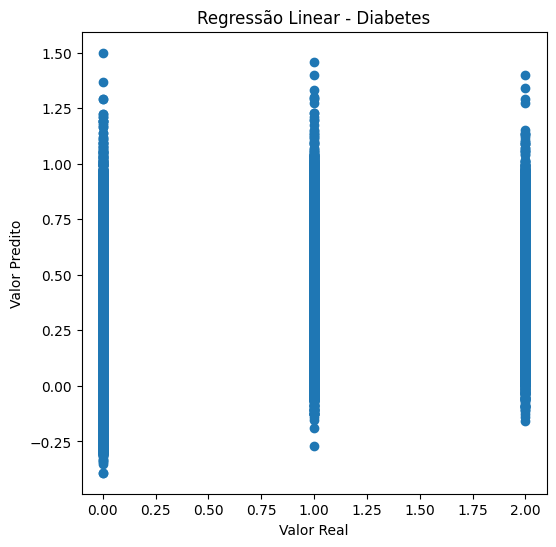

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Valor Real")
plt.ylabel("Valor Predito")
plt.title("Regressão Linear - Diabetes")
plt.show()